<a href="https://colab.research.google.com/github/SilverSurferClash/Binary_classification/blob/main/Import_clean_SFDC_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip freeze > requirements.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('dark_background')
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)
#Use option to round floats to two decimals
#pd.set_option('display.float_format',  '{:,.2f}'.format)
# Use option to display $ dollars
#pd.set_option('display.float_format', '${:.2f}'.format)
#sns.set_style("whitegrid")
# Plotting pretty figures and avoid blurry images
#%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_context('notebook')


# Enable multiple cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')              


In [4]:
os.getcwd()

'/content'

In [5]:
os.chdir("/content/drive/MyDrive/Colab_Notebooks/January_2023/Data")

In [18]:
dec_sfdc = pd.read_excel("./Dec_22.xlsx", sheet_name = 0, 
                            skiprows = 9)

In [19]:
dec_sfdc.head()

,Unnamed: 0,Accession #,Unnamed: 2,Reporting Country,Account: Reporting Country,Billing Type,Account: Account Name,Contact: Full Name,Date Received,Final Report Date,Test Ordered,Cancer Type
0,NaN,A0613863,NaN,GB,GB,Self-Pay Patient,Bupa Cromwell Hospital,Robert Leonard,11/16/2022,11/22/2022,Guardant 360,Breast Carcinoma
1,NaN,A0301804,NaN,GB,GB,Self-Pay Patient,Bupa Cromwell Hospital,Robert Leonard,11/9/2020,11/16/2020,Guardant 360,Breast Carcinoma
2,NaN,A0622096,NaN,GB,GB,Self-Pay Patient,Bupa Cromwell Hospital,Robert Leonard,11/30/2022,12/6/2022,Guardant 360,Breast Carcinoma
3,NaN,A0470223,NaN,GB,GB,Self-Pay Patient,Bupa Cromwell Hospital,Nick Plowman,2/18/2022,2/24/2022,Guardant 360,Small cell lung carcinoma
4,NaN,A0362325,NaN,GB,GB,Self-Pay Patient,Bupa Cromwell Hospital,John Conibear,6/4/2021,6/12/2021,Guardant 360,Lung adenocarcinoma


In [21]:

dec_sfdc.shape

(32338, 12)

#### Helper function

In [6]:
#Create a function that use the second element if the list has a length of 2 other return unknown

def clean_up_account(list_of_names):

  if len(list_of_names) == 2:
    return list_of_names[1]
  else:
    return list_of_names[0]





In [7]:
#Create a function to clean up the Billing type feature


Import helper data

In [20]:
#Import lookup table for countries
lookup_countries = pd.read_excel("./lookup.xlsx", sheet_name = 0)
#Import the data from SFDC as a excel file
import_sfdc = pd.read_excel("./Prospective.xlsx", sheet_name = 0, 
                            skiprows = 10)
#Create dictionairy for maping the lookup value
country_dict = dict(zip(lookup_countries["Reporting_Country_short"], lookup_countries["Account_Reporting_Country"]))
#Import lookup table for countries
lookup_type = pd.read_excel("./lookup.xlsx", sheet_name = "Type")
#Create dictionairy for maping the lookup values for LIMS ID
type_dict = dict(zip(lookup_type["LIMS Project ID"], lookup_type["Type"]))
#Dictionaire for AE support countries 
AE_dict = { 'CANADA': "AE", "SPAIN" : "AE", "UNITED KINGDOM" : "AE", "BRAZIL" : "AE", "TURKEY" : "AE", "IRELAND" : "AE"}
#Import lookup Cancer Type
lookup_cancer_type = pd.read_excel("./lookup.xlsx", sheet_name = "Cancer_type")
cancer_type_dict = dict(zip(lookup_cancer_type["Old"], lookup_cancer_type["New"]))
#Map the countries to the sub-regions
subregion_dict = dict(zip(lookup_countries["Account_Reporting_Country"], lookup_countries["Sub_region"]))
#Import the currency data
lookup_currency = pd.read_excel("./lookup.xlsx", sheet_name = "Currency", parse_dates= ["Month"]).set_index("Month")
lookup_currency["EUR"] = lookup_currency["EUR"]/1000000
lookup_currency["GBP"] = lookup_currency["GBP"]/1000000
lookup_currency["USD"] = 1

#Import the currency type
lookup_currency_type =  pd.read_excel("./lookup.xlsx", sheet_name = "curr_look")
#Inport lookun Billing_type - Needs further work
#lookup_billing_type = pd.read_excel("./lookup.xlsx", sheet_name = "Billing_type")
#billing_type_dict = dict(zip(lookup_billing_type["Billing Type"], lookup_billing_type["Billing Type.1"]))


In [9]:
curr_dict = dict(zip(lookup_currency_type["Account_Reporting_Country"], lookup_currency_type["Currency"]))

curr_dict

{'CANADA': 'USD',
 'SPAIN': 'EUR',
 'ITALY': 'EUR',
 'URUGUAY': 'USD',
 'BRAZIL': 'USD',
 'ARGENTINA': 'USD',
 'HUNGARY': 'EUR',
 'UNITED KINGDOM': 'GBP',
 'MEXICO': 'EUR',
 'BELGIUM': 'EUR',
 'TURKEY': 'USD',
 'COLOMBIA': 'USD',
 'PERU': 'USD',
 'FRANCE': 'EUR',
 'GERMANY': 'EUR',
 'PORTUGAL': 'EUR',
 'SWITZERLAND': 'EUR',
 'COSTA RICA': 'USD',
 'CHILE': 'USD',
 'SWEDEN': 'EUR',
 'NETHERLANDS': 'EUR',
 'DENMARK': 'EUR',
 'IRELAND': 'EUR',
 'GREECE': 'EUR',
 'AUSTRIA': 'EUR',
 'CZECH REPUBLIC': 'EUR',
 'CROATIA': 'EUR',
 'UKRAINE': 'EUR',
 'SLOVENIA': 'EUR',
 'RUSSIA': 'USD',
 'BELARUS': 'USD',
 'FINLAND': 'EUR',
 'PUERTO RICO': 'USD',
 'LITHUANIA': 'EUR',
 'NORTH MACEDONIA': 'EUR',
 'ROMANIA': 'EUR',
 'LUXEMBOURG': 'EUR',
 'POLAND': 'EUR'}

In [10]:

print(f"the currenvy rate is {lookup_currency.iloc[1,0]}")
lookup_currency.head(3)

the currenvy rate is 1.123847


,EUR,GBP,old,Unnamed: 4,USD
Month,,,,,
2015-08-01,1.11,1.56,2022-08-15,NaN,1
2015-09-01,1.12,1.53,2022-09-15,NaN,1
2015-10-01,1.12,1.53,2022-10-15,NaN,1


In [14]:
dec_sfdc = pd.read_excel("./Dec_22.xlsx", sheet_name = 0, 
                            skiprows = 10)

In [ ]:
#Identify which LIMS id are not in the lookup
unique_LIMS_id = list(set(import_sfdc["LIMS Project ID"]))
unique_lookup_id = list(set(lookup_type["LIMS Project ID"]))
list(set(unique_LIMS_id) - set(unique_lookup_id ))

[nan,
 'GAP_04',
 'TRM_01',
 'JNS_01',
 'OCT_1R',
 'AZN_test_96',
 'JNJ_32_EU',
 'RHI_04',
 'GAP_09']

In [12]:
import_sfdc.head()

,Unnamed: 0,Accession #,Unnamed: 2,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Date Received,Final Report Date,Test Type,Cancer Type
0,NaN,A0214386,NaN,CH,Pharma : ROW,AMG_01,AMG_01: Universitatsspital Zurich,Alessandra Curioni Fontecedro,11/25/2019,NaN,Guardant 360,Lung adenocarcinoma
1,NaN,A0214865,NaN,CA,Pharma : ROW,AMG_01,AMG_01: Princess Margaret Cancer Centre,Adrian Sacher,11/26/2019,NaN,Guardant 360,Lung adenocarcinoma
2,NaN,A0215878,NaN,BE,Pharma : ROW,AMG_01,AMG_01: Universitair Ziekenhuis Antwerpen,Hans Prenen,11/29/2019,NaN,Guardant 360,Lung adenocarcinoma
3,NaN,A0215958,NaN,DE,Pharma : US,AMG_01,AMG_01: Universitatsklinikum Koln,Wolf Juergen,11/30/2019,NaN,Guardant 360,Lung adenocarcinoma
4,NaN,A0215959,NaN,DE,Pharma : ROW,AMG_01,AMG_01: Universitatsklinikum Koln,Wolf Juergen,11/30/2019,NaN,Guardant 360,Lung adenocarcinoma


#### Import and clean up the data from SFDC

In [13]:
#Remove the first two columns
import_sfdc = import_sfdc.drop(["Unnamed: 0", "Unnamed: 2"], axis = 1)
#Drop the last five rows
import_sfdc = import_sfdc.iloc[0:-5]
#Cast Date Received to datetime object 
#import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
#Clean up the type column
import_sfdc["Type"] = import_sfdc["LIMS Project ID"].map(type_dict)

#Replace the two letter country code with the full country name
import_sfdc["Reporting Country"] = import_sfdc["Reporting Country"].map(country_dict)
#Clean up the cancer types and reduce number of categories
import_sfdc["Cancer Type"] = import_sfdc["Cancer Type"].map(cancer_type_dict)
#Clean up the Account column by removing all strings before the ":"
import_sfdc["Account: Account Name"] = import_sfdc.loc[:, "Account: Account Name"].str.split(":").apply(clean_up_account)

#Clean up the Billing type column 
#import_sfdc["Billing Type"] = import_sfdc["Billing Type"].map(billing_type_dict)
#import_sfdc.tail(6)

# Set the date recieved as date index
#import_sfdc = import_sfdc.set_index("Date Received")

#import_sfdc.info()

In [14]:
#df[“column_name”] = np.where(df[“column_name”]==”some_value”, value_if_true, value_if_false)
import_sfdc["AE_supported"] = np.where(import_sfdc["Reporting Country"].isin(AE_dict.keys()), "AE", "non_AE")

#Add a column with the information about the currency based on the imported dictionairy
import_sfdc["Currency"] = import_sfdc["Reporting Country"].map(curr_dict)


In [15]:
import_sfdc

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Date Received,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency
0,A0214386,SWITZERLAND,Pharma : ROW,AMG_01,Universitatsspital Zurich,Alessandra Curioni Fontecedro,11/25/2019,NaN,Guardant 360,NaN,Biopharma,non_AE,EUR
1,A0214865,CANADA,Pharma : ROW,AMG_01,Princess Margaret Cancer Centre,Adrian Sacher,11/26/2019,NaN,Guardant 360,NaN,Biopharma,AE,USD
2,A0215878,BELGIUM,Pharma : ROW,AMG_01,Universitair Ziekenhuis Antwerpen,Hans Prenen,11/29/2019,NaN,Guardant 360,NaN,Biopharma,non_AE,EUR
3,A0215958,GERMANY,Pharma : US,AMG_01,Universitatsklinikum Koln,Wolf Juergen,11/30/2019,NaN,Guardant 360,NaN,Biopharma,non_AE,EUR
4,A0215959,GERMANY,Pharma : ROW,AMG_01,Universitatsklinikum Koln,Wolf Juergen,11/30/2019,NaN,Guardant 360,NaN,Biopharma,non_AE,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,A0318002,UNITED KINGDOM,Research : ROW,VLT_01,VLT_01-Royal Brompton Hospital,RS-Eric Lim,1/6/2021,NaN,LUNAR1_3,NaN,Lunar,AE,GBP
15747,A0319936,UNITED KINGDOM,Research : ROW,VLT_01,VLT_01-Royal Brompton Hospital,RS-Eric Lim,1/11/2021,NaN,LUNAR1_3,NaN,Lunar,AE,GBP
15748,A0319935,UNITED KINGDOM,Research : ROW,VLT_01,VLT_01-Royal Brompton Hospital,RS-Eric Lim,1/11/2021,NaN,LUNAR1_3,NaN,Lunar,AE,GBP
15749,A0320961,UNITED KINGDOM,Research : ROW,VLT_01,VLT_01-Royal Brompton Hospital,RS-Eric Lim,1/15/2021,NaN,LUNAR1_3,NaN,Lunar,AE,GBP


In [28]:
import_sfdc["Sub_region"] = import_sfdc["Reporting Country"]
import_sfdc["Sub_region"] = import_sfdc["Sub_region"].map(subregion_dict)

In [29]:
import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
import_sfdc = import_sfdc.set_index("Date Received")

In [30]:
#Create date and time features

#Create a year, month, quarter variable
import_sfdc["Month"] = import_sfdc.index.month
import_sfdc["Year"] = import_sfdc.index.year
import_sfdc['Quarter'] = import_sfdc.index.quarter
#Other feature engineering based on feature analysis below
import_sfdc['Sales'] = 1

#create a Year Month columns
import_sfdc['Year_Month'] = import_sfdc.index.to_period('M')
#Cast the Year_Month column to a str
import_sfdc['Year_Month'] = import_sfdc['Year_Month'].astype(str)
import_sfdc['Year_Month'] = pd.to_datetime(import_sfdc['Year_Month'])
#Cast some features to categorical
#df['Reporting_Country'] = df['Reporting_Country'].astype('category')
import_sfdc['Type'] = import_sfdc['Type'].astype('category')
#Add a column to allow merging this datafarme with the currency_lookup
#import_sfdc["Month_to_match"] = f"{import_sfdc[["Year"]]}_{import_sfdc[["Month"]]}"
import_sfdc["Month_to_match"] = import_sfdc["Year"].astype("string") + "-" + import_sfdc["Month"].astype("string")

In [31]:
import_sfdc["Year"]

Date Received
2019-11-25    2019
2019-11-26    2019
2019-11-29    2019
2019-11-30    2019
2019-11-30    2019
              ... 
2021-01-06    2021
2021-01-11    2021
2021-01-11    2021
2021-01-15    2021
2021-01-20    2021
Name: Year, Length: 15751, dtype: int64

In [32]:
import_sfdc.sample(5)

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match
Date Received,,,,,,,,,,,,,,,,,,,
2019-10-23,A0203960,BELGIUM,Pharma : US,RHI_E1,RHI_E1: UZ Antwerpen Oncologie,Wiebren Tjalma,10/29/2019,Guardant 360,Breast,Biopharma,non_AE,EUR,Europe,10,2019,4,1,2019-10-01,2019-10
2021-07-12,A0375060,SPAIN,Pharma : ROW,KGA_17,KGA_17: HM Universitario Sanchinarro,Antonio Cubillo Gracian,7/24/2021,Guardant 360,NaN,Biopharma,AE,EUR,Europe,7,2021,3,1,2021-07-01,2021-7
2020-02-27,A0238193,UNITED KINGDOM,Research : ROW,VLT_01,VLT_01-Royal Brompton Hospital,RS-Eric Lim,NaN,LUNAR1_3,NaN,Lunar,AE,GBP,Europe,2,2020,1,1,2020-02-01,2020-2
2022-10-12,A0592905,FRANCE,Pharma : ROW,JNS_09,JNS_09 Hopital de la Timone,Pascale Tomasini,10/19/2022,Guardant 360,NaN,Biopharma,non_AE,EUR,Europe,10,2022,4,1,2022-10-01,2022-10
2019-03-06,A0153898,UNITED KINGDOM,Pharma : ROW,PMT_01,PMT_01 The Institute of Cancer Research,Nicholas Turner,3/19/2019,Guardant 360,Breast,GH Trials (Prospective),AE,GBP,Europe,3,2019,1,1,2019-03-01,2019-3


#### Explore the data

In [ ]:
#import_sfdc["Reporting Country"].value_counts()

In [ ]:
#import_sfdc.Type.value_counts()

In [ ]:
#import_sfdc.info()

In [ ]:
#import_sfdc["Billing Type"].value_counts()

In [ ]:
#import_sfdc["Test Type"].value_counts()

In [ ]:
#import_sfdc["Cancer Type"].value_counts()

In [ ]:
#import_sfdc['Billing Type'].value_counts()

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab_Notebooks/November_2022'

In [ ]:
# Import the revenue data

revenue_import = pd.read_excel("./Sales_Volume_EUAA_Analytics_Oct_22.xlsx", skiprows = 28)
revenue_import = revenue_import.iloc[:, 1:12]
#revenue_import.columns.tolist()
revenue_import['Accession #']= revenue_import['Accession #'].fillna("missing") 
revenue_import = revenue_import[revenue_import['Accession #'].str.startswith("A0")]
#revenue_import.info()

In [ ]:
revenue_import.head()


,Account: Reporting Country ↑,Date Received,Accession #,Account: Account Name,Contact: Full Name,Billing Type,Final Report Date,Invoiced Amount,Expected Amount $,Invoiced/In Prg.,FOC
0,BR,9/30/2019,A0198807,Rede D'Or Hospital,Maria Ignez Braghiroli,Self-Pay Patient,10/6/2019,0.0,0.0,NaN,x
1,NaN,9/18/2019,A0196311,Rede D'Or Hospital,Milena Mak,Self-Pay Patient,9/26/2019,0.0,0.0,NaN,x
3,CA,9/17/2019,A0196102,Medicor Cancer Centres,Akbar Khan,Self-Pay Patient,9/26/2019,3490.0,3490.0,NaN,NaN
4,NaN,9/12/2019,A0195058,South Sherbrook Health Centre,Anthony Morham,Self-Pay Patient,9/20/2019,3490.0,3490.0,NaN,NaN
6,CL,9/18/2019,A0196290,Clinica Las Condes,Jose Miguel Reyes,Self-Pay Patient,9/26/2019,3490.0,3490.0,NaN,NaN


In [ ]:
#revenue_import.columns.tolist()

In [ ]:
revenue_col_list = ['Accession #', 'Invoiced Amount','Expected Amount $','Invoiced/In Prg.', 'FOC']

In [ ]:
#Define the clean up function for the FOC columns
def foc_clean_up(value):

  if value == "x":
    return "Free"

  elif value == "x (COV19)":
     return "Free"
  elif value == "x (Christie)":
    return "Free"
  else: 
    return value

#Clean up Docuten

def docuten_clean_up(value):

  if value == "y (DOCUTEN)":
    return "Free"

  else: 
    return value

#Clean up the revenue data and extract the free of charge information
revenue_import_clean = revenue_import.loc[:, revenue_col_list].copy()
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].fillna("Paid")
revenue_import_clean.tail()

,Accession #,Invoiced Amount,Expected Amount $,Invoiced/In Prg.,FOC
4279,A0608339,1890.0,Accounts Receivable,NaN,Paid
4280,A0608344,0.0,G360 Experience Project 11/15,NaN,Paid
4281,A0606576,0.0,G360 Experience Project 13/15,NaN,Paid
4282,A0606586,2319.0,Accounts Receivable - G360 - 83 GENE,NaN,Paid
4283,A0605814,1890.0,Accounts Receivable - Tested as 2.12 by mistak...,NaN,Paid


In [ ]:
#revenue_import_clean["FOC"].value_counts()

In [ ]:
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].apply(foc_clean_up).astype("category")

In [ ]:
revenue_import_clean["FOC"].value_counts()

Paid    3016
Free     736
           1
Name: FOC, dtype: int64

In [ ]:
#Join the two dataframes

df_merged = import_sfdc.merge(revenue_import_clean[["Accession #", "FOC", "Invoiced Amount"]], how='inner', on = "Accession #")
df_merged.sample(3)

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match,FOC,Invoiced Amount
3587,A0582481,UNITED KINGDOM,Distributors : ROW,GHI_19,HCA Laboratories,Hendrik-Tobias Arkenau,9/28/2022,Guardant360 CDx EU,Thyroid,Commercial,AE,GBP,Europe,9,2022,3,1,2022-09-01,2022-9,Paid,2178.75
1974,A0392927,UNITED KINGDOM,Self-Pay Patient,GHI_01,Royal Surrey County Hospital - St Luke's Cance...,Ajay Mehta,9/5/2021,Guardant 360,NaN,Commercial,AE,GBP,Europe,8,2021,3,1,2021-08-01,2021-8,Free,GBP 0.00
1435,A0347732,UNITED KINGDOM,Do Not Bill - Cancelled,GHI_01,Sussex Cancer Centre,Muawia Mohamed,4/20/2021,Guardant 360,NaN,Commercial,AE,GBP,Europe,4,2021,2,1,2021-04-01,2021-4,Paid,0.0


In [ ]:
# Startinf dataframe for all years
#import_sfdc.info()

In [ ]:
#Cleaned up dataframe included FOC information starting from around 2019
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 3748
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Accession #            3749 non-null   object        
 1   Reporting Country      3749 non-null   object        
 2   Billing Type           3749 non-null   object        
 3   LIMS Project ID        3749 non-null   object        
 4   Account: Account Name  3749 non-null   object        
 5   Contact: Full Name     3749 non-null   object        
 6   Final Report Date      3715 non-null   object        
 7   Test Type              3749 non-null   object        
 8   Cancer Type            1256 non-null   object        
 9   Type                   3749 non-null   category      
 10  AE_supported           3749 non-null   object        
 11  Currency               3749 non-null   object        
 12  Sub_region             3749 non-null   object        
 13  Mon

#### Plotting

In [ ]:
#Select the features for the analysis
import_sfdc.columns.to_list()
list_for_country_analysis = ['Accession #',
 'Reporting Country',
 'Type',
 'Sales',
 'Year_Month', "Sub_region", "AE_supported", "Currency"]

countries_df = import_sfdc.loc[:,list_for_country_analysis ]
#countries_df["Reporting Country"] = countries_df["Reporting Country"].astype('category')
countries_df.sample(3)

,Accession #,Reporting Country,Type,Sales,Year_Month,Sub_region,AE_supported,Currency
Date Received,,,,,,,,
2021-10-18,A0414224,POLAND,Biopharma,1,2021-10-01,Europe,non_AE,EUR
2022-03-08,A0478446,UNITED KINGDOM,Commercial,1,2022-03-01,Europe,AE,GBP
2020-11-09,A0302049,SPAIN,Lunar,1,2020-11-01,Europe,AE,EUR


In [ ]:
#Starting df for plotting
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15751 entries, 2019-11-25 to 2021-01-20
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accession #        15751 non-null  object        
 1   Reporting Country  15751 non-null  object        
 2   Type               15633 non-null  category      
 3   Sales              15751 non-null  int64         
 4   Year_Month         15751 non-null  datetime64[ns]
 5   Sub_region         15751 non-null  object        
 6   AE_supported       15751 non-null  object        
 7   Currency           15751 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(5)
memory usage: 1000.0+ KB


# Select the time period for analysis in the # of counztries to be analysed

In [ ]:
#Select the time horizion to analyse
start_date = "2018-01-01"
end_date = "2022-10-31"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon
num_countries = 6
#Create the dataframe relevant for the time periode which should be analysed
countries_df = countries_df.set_index("Year_Month").sort_index()
countries_df = countries_df.loc[start_date:end_date].copy()
print(f"The total number of samples in this dataframe is {countries_df.shape[0]}")

KeyError: ignored

In [ ]:
# countries_df is the main dataframe for the analysis
countries_df.tail()

In [ ]:
#Create a dataframe with just the topx countries by number of tests sold
top_x = countries_df.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries)
top_x_list = top_x.index.tolist()
top_x_sales =countries_df[countries_df['Reporting Country'].isin(top_x_list)]
print(f"The top {num_countries} countries have {top_x_sales.shape[0]} samples which represents {top_x_sales.shape[0]/countries_df.shape[0]:.2%}")

In [ ]:
#Starting dataframe for plotting with date defined and the number of countries
#top_x_sales.info()

In [ ]:
#Merging the GH trials and LUNAR into ISTs

def merge_ISTs(x):
  if x == "GH Trials (Prospective)":
    return "ISTs"
  elif x == "Lunar":
    return "ISTs"
  else:
    return x

In [ ]:
top_x_sales["Type"] = top_x_sales["Type"].map(merge_ISTs)

top_x_sales["Type"].value_counts()

In [ ]:
all_countries_by_type = top_x_sales.groupby(['Year_Month', "Type"]).sum().reset_index()
all_countries_by_type.head(3)

In [ ]:
all_countries_by_type.shape

In [ ]:
all_countries_by_type.tail()

In [ ]:
#Save the all_countries df for timeseries forecasting with Prophet

all_countries_by_type.to_csv("forecast_test.csv")

In [ ]:
#Use relpot for plotting

In [ ]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_by_type, x = "Year_Month", y = "Sales", kind = "line", col = "Type", color = "#7851a9", linewidth=4 )
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Tests per Month for the different Sample Categories', y=1.05)

plt.savefig('facet_plot.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("facet_plot.pdf")
plt.show()


In [ ]:
#Total sales across the region
total_sales_regions = top_x_sales.groupby(['Year_Month']).sum().reset_index()


In [ ]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = total_sales_regions, x = "Year_Month", y = "Sales", kind = "line", color = "#7851a9", linewidth=4 ,height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Total # of Tests per Month International', y=1.05)

plt.savefig('facet_plot.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("facet_plot.pdf")
plt.show()

In [ ]:
#Re-create the stacked area plot used so far


#Create a df in the wide format with the type category providing the new column labels

all_countries_pivot_type = all_countries_by_type.pivot(index = "Year_Month", columns = "Type", values = "Sales")
all_countries_pivot_type.head()


In [ ]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')
plt.subplots(figsize=(16, 8))


# Plot x-labels, y-label and data
plt.plot([], [], color ="crimson",
         label ="Biopharma")
plt.plot([], [], color ='green',
         label ='Commercial')
plt.plot([], [], color ='royalblue',
         label ='GAP')
plt.plot([], [], color ='magenta',
         label ='ISTs')


plt.stackplot(all_countries_pivot_type.index, all_countries_pivot_type["Biopharma"],
              all_countries_pivot_type["Commercial"],
              all_countries_pivot_type["GAP"],
              all_countries_pivot_type["ISTs"],
              colors =["crimson", 'green', 'royalblue', 'magenta'])
 
plt.grid(False)
plt.legend(loc='upper right')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Tests per Month')
 
# Title of Graph
plt.title('Month Test Volume International Markets for all Categories')

 
# Displaying Graph


plt.savefig("test_t.pdf", transparent = True)
#files.download("test_t.pdf")
plt.show()

#### Stacked area plot for Commercial, GAP and ISTS

In [ ]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')
plt.subplots(figsize=(16, 8))


# Plot x-labels, y-label and data

plt.plot([], [], color ='dimgrey',
         label ='Commercial')
plt.plot([], [], color ='cornsilk',
         label ='GAP')
plt.plot([], [], color ='lightcoral',
         label ='ISTs')


plt.stackplot(all_countries_pivot_type.index,
              all_countries_pivot_type["Commercial"],
              all_countries_pivot_type["GAP"],
              all_countries_pivot_type["ISTs"],
              colors =['dimgrey', 'cornsilk', 'lightcoral'])
 
plt.grid(False)
plt.legend(loc='upper right')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Tests per Month')
 
# Title of Graph
plt.title('Month Test Volume International Markets for all Categories')

 
# Displaying Graph
plt.show()

#### Plot the relative percentage of sample in each category over time

In [ ]:
all_countries_pivot_type.head()

In [ ]:
all_countries_pivot_type = all_countries_pivot_type.fillna(0)


In [ ]:


all_countries_pivot_type["Total Sales"] = all_countries_pivot_type["Biopharma"] +all_countries_pivot_type["GAP"] + all_countries_pivot_type["Commercial"] + all_countries_pivot_type["ISTs"]

all_countries_pivot_type["Percent Commercial"] = (all_countries_pivot_type["Commercial"]/all_countries_pivot_type["Total Sales"])*100

all_countries_pivot_type["Percent Biopharma"] = (all_countries_pivot_type["Biopharma"]/all_countries_pivot_type["Total Sales"])*100

all_countries_pivot_type["Percent GAP"] = (all_countries_pivot_type["GAP"]/all_countries_pivot_type["Total Sales"])*100

all_countries_pivot_type["Percent ISTs"] = (all_countries_pivot_type["ISTs"]/all_countries_pivot_type["Total Sales"])*100


In [ ]:
all_countries_pivot_type.head(2)

In [ ]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')
plt.subplots(figsize=(16, 8))


# Plot x-labels, y-label and data
plt.plot([], [], color ="lightsteelblue",
         label ="Biopharma")
plt.plot([], [], color ='dimgrey',
         label ='Commercial')
plt.plot([], [], color ='cornsilk',
         label ='GAP')
plt.plot([], [], color ='lightcoral',
         label ='ISTs')


plt.stackplot(all_countries_pivot_type.index, all_countries_pivot_type["Percent Biopharma"],
              all_countries_pivot_type["Percent Commercial"],
              all_countries_pivot_type["Percent GAP"],
              all_countries_pivot_type["Percent ISTs"],
              colors =["lightsteelblue", 'dimgrey', 'cornsilk', 'lightcoral'])
 
plt.grid(False)
plt.legend(loc='upper left')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Percentage')
 
# Title of Graph
plt.title('Percentage of Samples from each Category')

 
# Displaying Graph
plt.show()

#### Add second y axis

In [ ]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')


fig, ax = plt.subplots(1,1, figsize = (16, 8))

ax2 = ax.twinx()

# Plot x-labels, y-label and data
ax.plot([], [], color ="lightsteelblue",
         label ="Biopharma")
ax.plot([], [], color ='dimgrey',
         label ='Commercial')
ax.plot([], [], color ='cornsilk',
         label ='GAP')
ax.plot([], [], color ='lightcoral',
         label ='ISTs')


ax.stackplot(all_countries_pivot_type.index, all_countries_pivot_type["Percent Biopharma"],
              all_countries_pivot_type["Percent Commercial"],
              all_countries_pivot_type["Percent GAP"],
              all_countries_pivot_type["Percent ISTs"],
              colors =["lightsteelblue", 'dimgrey', 'cornsilk', 'lightcoral'])

ax2.plot(all_countries_pivot_type.index, all_countries_pivot_type["Total Sales"], color = 'b')
 
plt.grid(False)
plt.legend(loc='upper left')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Percentage')
 
# Title of Graph
plt.title('Percentage of Samples from each Category')

 
# Displaying Graph
plt.show()

# Analysing the breakdown of commercial samples

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 3748
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Accession #            3749 non-null   object        
 1   Reporting Country      3749 non-null   object        
 2   Billing Type           3749 non-null   object        
 3   LIMS Project ID        3749 non-null   object        
 4   Account: Account Name  3749 non-null   object        
 5   Contact: Full Name     3749 non-null   object        
 6   Final Report Date      3715 non-null   object        
 7   Test Type              3749 non-null   object        
 8   Cancer Type            1256 non-null   object        
 9   Type                   3749 non-null   category      
 10  AE_supported           3749 non-null   object        
 11  Currency               3749 non-null   object        
 12  Sub_region             3749 non-null   object        
 13  Mon

In [ ]:
#Select the time horizion to analyse
start_date_com = "2019-10-01"
end_date_com = "2022-10-31"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon
num_countries_comm = 20
#The the Year_Month columns as index to allow for easier slicing
df_merged = df_merged.set_index("Year_Month").sort_index()
#Create the dataframe relevant for the time periode which should be analysed
df_merged_time_horizon = df_merged.loc[start_date_com:end_date_com].copy().reset_index()
print(f"The total number of samples in this dataframe is {df_merged_time_horizon.shape[0]}")

The total number of samples in this dataframe is 3647


In [ ]:
#identiy the top commercial countries
df_merged_time_horizon["FOC"] = df_merged_time_horizon["FOC"].astype("string")

#Create the dataframe relevant for the time periode which should be analysed

print(f"The total number of samples in this dataframe is {df_merged_time_horizon.shape[0]}")


The total number of samples in this dataframe is 3647


In [ ]:
df_merged_time_horizon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year_Month             3647 non-null   datetime64[ns]
 1   Accession #            3647 non-null   object        
 2   Reporting Country      3647 non-null   object        
 3   Billing Type           3647 non-null   object        
 4   LIMS Project ID        3647 non-null   object        
 5   Account: Account Name  3647 non-null   object        
 6   Contact: Full Name     3647 non-null   object        
 7   Final Report Date      3643 non-null   object        
 8   Test Type              3647 non-null   object        
 9   Cancer Type            1227 non-null   object        
 10  Type                   3647 non-null   category      
 11  AE_supported           3647 non-null   object        
 12  Currency               3647 non-null   object        
 13  Sub

In [ ]:
#Create a dataframe with just the topx countries by number of tests sold
#top_comm_x = df_merged_time_horizon.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries_comm)
#top_comm_x_list = top_comm_x.index.tolist()
#List of countries based on Ian's input
country_list = ['UNITED KINGDOM', 'SPAIN', 'BRAZIL', 'TURKEY', 'CANADA',"FRANCE", "Italy" ]
top_comm_x_sales =df_merged_time_horizon[df_merged_time_horizon['Reporting Country'].isin(country_list)]
print(f"The top 7 countries have {top_comm_x_sales.shape[0]} samples which represents {top_comm_x_sales.shape[0]/df_merged_time_horizon.shape[0]:.2%}")

The top 7 countries have 3236 samples which represents 88.73%


In [ ]:
#top_comm_x_list

In [ ]:
#merged_top_x_countries = df_merged[df_merged['Reporting Country'].isin(top_comm_x_list)]
#merged_top_x_countries["Reporting Country"].value_counts()

In [ ]:
list_for_FOC_analysis = [
 'Reporting Country',
 'Type',
 'Sales', 'FOC',
 'Year_Month']

In [ ]:
#Create the main data frame for the further analysis
commercial_sales_FOC_analysis_df = top_comm_x_sales[list_for_FOC_analysis]
commercial_sales_FOC_analysis_df["FOC"] = commercial_sales_FOC_analysis_df["FOC"].astype("category")

#This is the main dataframe
commercial_sales_FOC_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3236 entries, 0 to 3646
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Reporting Country  3236 non-null   object        
 1   Type               3236 non-null   category      
 2   Sales              3236 non-null   int64         
 3   FOC                3236 non-null   category      
 4   Year_Month         3236 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 107.8+ KB


In [ ]:
commercial_sales_FOC_analysis_df["FOC"].value_counts()

Paid    2553
Free     682
           1
Name: FOC, dtype: int64

In [ ]:
FOC_df = commercial_sales_FOC_analysis_df.groupby(['Year_Month','Reporting Country', "FOC"]).sum().reset_index()
FOC_df.tail()


,Year_Month,Reporting Country,FOC,Sales
661,2022-10-01,TURKEY,Free,0
662,2022-10-01,TURKEY,Paid,17
663,2022-10-01,UNITED KINGDOM,,0
664,2022-10-01,UNITED KINGDOM,Free,27
665,2022-10-01,UNITED KINGDOM,Paid,52


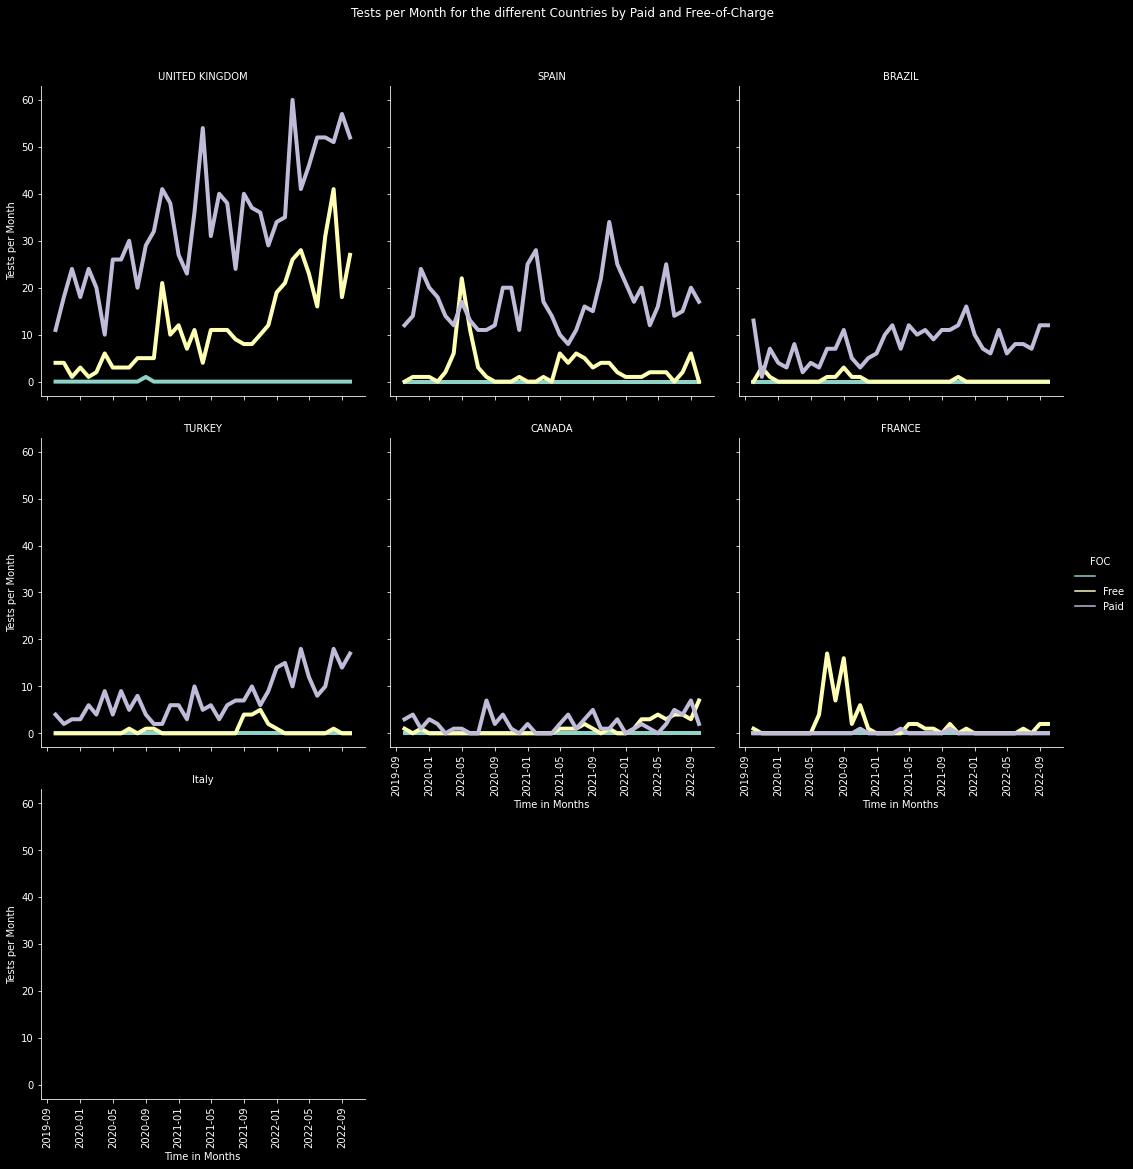

In [ ]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = FOC_df, x = "Year_Month", y = "Sales", kind = "line", hue = "FOC", col = "Reporting Country", color = "#7851a9", linewidth=4 , ci = None, col_wrap = 3
                ,col_order = country_list
                )
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Tests per Month for the different Countries by Paid and Free-of-Charge', y=1.05)

plt.savefig('comm.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("comm.pdf")
plt.show();


In [ ]:
#Total sales
all_countries_comm = commercial_sales_FOC_analysis_df.groupby(['Year_Month', "FOC"]).sum().reset_index()
all_countries_comm.sample(3)

,Year_Month,FOC,Sales
85,2022-02-01,Free,23
11,2020-01-01,Paid,48
23,2020-05-01,Paid,52


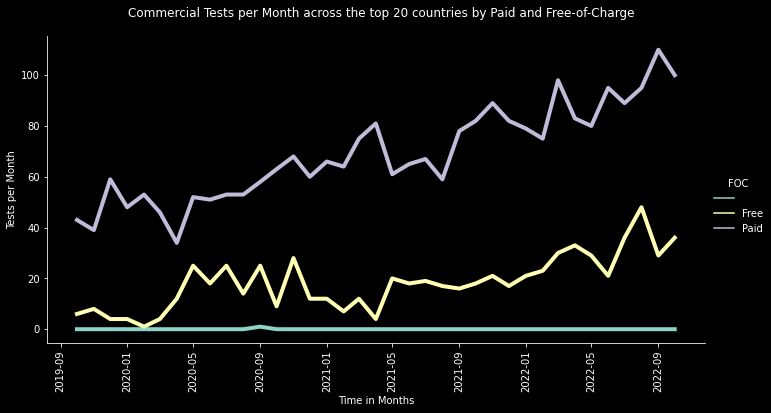

In [ ]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_comm , x = "Year_Month", y = "Sales", kind = "line", hue = "FOC",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests per Month across the top {num_countries_comm} countries by Paid and Free-of-Charge", y=1.05)

plt.savefig('comm_all.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("comm_all.pdf")
plt.show()

In [ ]:
#All Commercial cases including free
all_countries_incl_free = commercial_sales_FOC_analysis_df.groupby(['Year_Month']).sum().reset_index()
all_countries_incl_free.head()

,Year_Month,Sales
0,2019-10-01,49
1,2019-11-01,47
2,2019-12-01,63
3,2020-01-01,52
4,2020-02-01,54


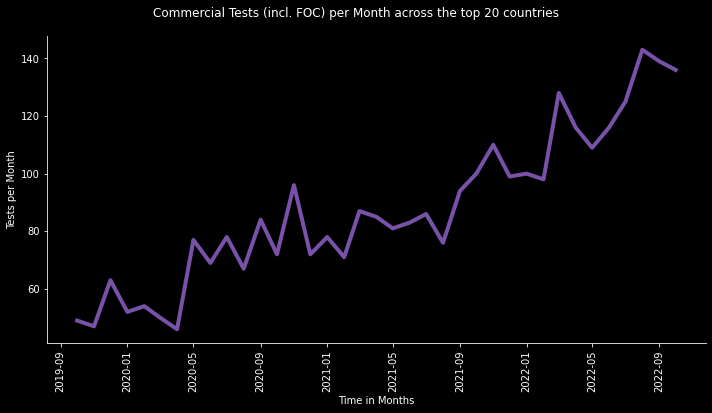

In [ ]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_incl_free  , x = "Year_Month", y = "Sales", kind = "line",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests (incl. FOC) per Month across the top {num_countries_comm} countries", y=1.05)

plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Rolling Mean Analysis

In [ ]:

commercial_sales_rolling_df = commercial_sales_FOC_analysis_df.groupby(["Year_Month"])["Sales"].sum().reset_index()

In [ ]:
commercial_sales_rolling_df["Rolling 3-Month Average"] = commercial_sales_rolling_df["Sales"].rolling(3).mean()

In [ ]:
commercial_sales_rolling_df.head()

,Year_Month,Sales,Rolling 3-Month Average
0,2019-10-01,49,NaN
1,2019-11-01,47,NaN
2,2019-12-01,63,53.00
3,2020-01-01,52,54.00
4,2020-02-01,54,56.33


In [ ]:
melt = commercial_sales_rolling_df.melt(id_vars = "Year_Month", value_vars = ["Sales", "Rolling 3-Month Average"], value_name= "Smoothed Sales")

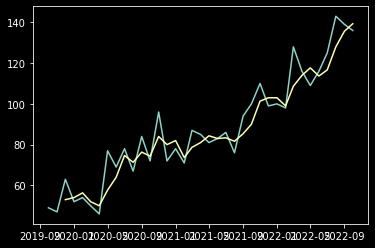

In [ ]:
fig, ax = plt.subplots()
ax.plot(commercial_sales_rolling_df["Year_Month"],commercial_sales_rolling_df["Sales"])
ax.plot(commercial_sales_rolling_df["Year_Month"],commercial_sales_rolling_df["Rolling 3-Month Average"])
plt.show()

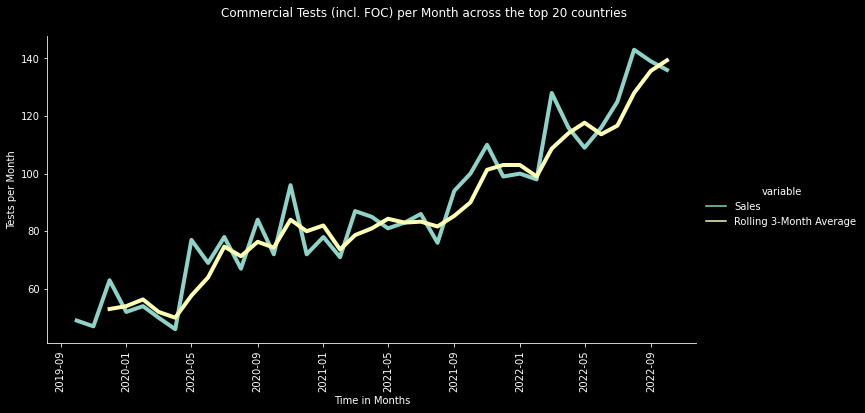

In [ ]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = melt  , x = "Year_Month", y = "Smoothed Sales", hue = "variable", kind = "line",  color = "#7851a9",
                linewidth=4 , 
                ci = None, height=5, aspect=10/5)

g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests (incl. FOC) per Month across the top {num_countries_comm} countries", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Percentages growth

In [ ]:
commercial_sales_FOC_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3236 entries, 0 to 3646
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Reporting Country  3236 non-null   object        
 1   Type               3236 non-null   category      
 2   Sales              3236 non-null   int64         
 3   FOC                3236 non-null   category      
 4   Year_Month         3236 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 107.8+ KB


In [ ]:
commercial_sales_FOC_analysis_df.head()

,Reporting Country,Type,Sales,FOC,Year_Month
0,SPAIN,Commercial,1,Paid,2019-10-01
1,SPAIN,Commercial,1,Paid,2019-10-01
2,UNITED KINGDOM,Commercial,1,Paid,2019-10-01
4,UNITED KINGDOM,Commercial,1,Paid,2019-10-01
5,UNITED KINGDOM,Commercial,1,Paid,2019-10-01


In [ ]:
#Creat a data set with the monthly revenue for all countries, Calcualte the percent growth by using the percent_change function
commercial_percent = commercial_sales_FOC_analysis_df.groupby(["Year_Month"]).sum().reset_index().set_index("Year_Month")

In [ ]:
commercial_percent["Annual_Growth(%)"] = commercial_percent.pct_change(periods = 12).mul(100)

In [ ]:
commercial_percent.tail()

,Sales,Annual_Growth(%)
Year_Month,,
2022-06-01,116,39.76
2022-07-01,125,45.35
2022-08-01,143,88.16
2022-09-01,139,47.87
2022-10-01,136,36.00


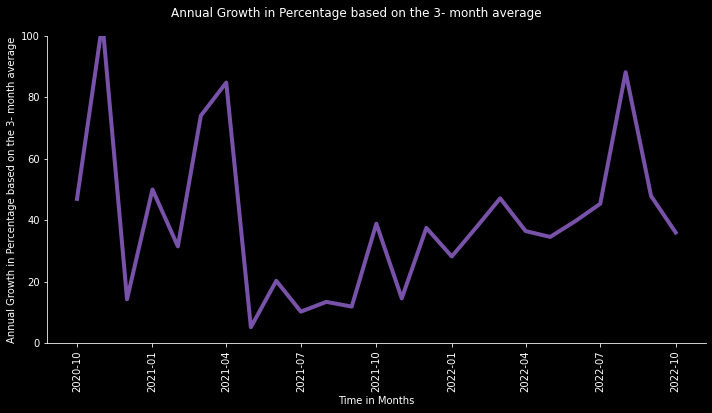

In [ ]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = commercial_percent  , x = "Year_Month", y = "Annual_Growth(%)", kind = "line",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set(ylim = (0,100))
g.set_ylabels("Annual Growth in Percentage based on the 3- month average")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Annual Growth in Percentage based on the 3- month average", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

In [ ]:
#Calculate the percentage growth based on the 3 month rolling mean
commercial_sales_rolling_df["Percent_growth_3_month_average"] = commercial_sales_rolling_df.set_index("Year_Month")["Rolling 3-Month Average"].pct_change(periods=6).mul(100)

In [ ]:
#commercial_sales_rolling_df

# Charts for Rev Core

In [ ]:
#Chart 1

In [ ]:
countries_df.reset_index()

,Year_Month,Accession #,Reporting Country,Type,Sales,Sub_region,AE_supported,Currency
0,2019-01-01,A0143263,ITALY,Biopharma,1,Europe,non_AE,EUR
1,2019-01-01,A0142625,BRAZIL,Commercial,1,Americas,AE,USD
2,2019-01-01,A0142937,SPAIN,Commercial,1,Europe,AE,EUR
3,2019-01-01,A0142634,UNITED KINGDOM,GH Trials (Prospective),1,Europe,AE,GBP
4,2019-01-01,A0142635,UNITED KINGDOM,GH Trials (Prospective),1,Europe,AE,GBP
...,...,...,...,...,...,...,...,...
15517,2022-10-01,A0591496,SPAIN,Biopharma,1,Europe,AE,EUR
15518,2022-10-01,A0594281,FRANCE,Biopharma,1,Europe,non_AE,EUR
15519,2022-10-01,A0600274,BELGIUM,Biopharma,1,Europe,non_AE,EUR
15520,2022-10-01,A0594228,FRANCE,Biopharma,1,Europe,non_AE,EUR


In [ ]:
countries_df.groupby(["Year_Month", "Sub_region", "Type"])["Sales"].sum().reset_index().tail(10)

,Year_Month,Sub_region,Type,Sales
450,2022-10-01,Americas,Biopharma,29
451,2022-10-01,Americas,Commercial,28
452,2022-10-01,Americas,GAP,0
453,2022-10-01,Americas,GH Trials (Prospective),0
454,2022-10-01,Americas,Lunar,11
455,2022-10-01,Europe,Biopharma,274
456,2022-10-01,Europe,Commercial,123
457,2022-10-01,Europe,GAP,7
458,2022-10-01,Europe,GH Trials (Prospective),15
459,2022-10-01,Europe,Lunar,49


In [ ]:
# Figure out the commercial volume by region in October 2022

In [ ]:
df_merged_time_horizon.groupby(["Year_Month", "Sub_region"])["Sales"].sum().reset_index()

,Year_Month,Sub_region,Sales
0,2019-10-01,Americas,25
1,2019-10-01,Europe,36
2,2019-11-01,Americas,12
3,2019-11-01,Europe,43
4,2019-12-01,Americas,15
...,...,...,...
69,2022-08-01,Europe,133
70,2022-09-01,Americas,23
71,2022-09-01,Europe,123
72,2022-10-01,Americas,28


AE vs non_AE countries

In [ ]:
AE_analysis = df_merged_time_horizon.groupby(["Year_Month", "AE_supported"])["Sales"].sum().reset_index()

In [ ]:
AE_pivot = AE_analysis.pivot(index = "Year_Month", columns = "AE_supported", values = "Sales")

In [ ]:
AE_pivot.tail()

AE_supported,AE,non_AE
Year_Month,,
2022-06-01,121,14
2022-07-01,127,10
2022-08-01,144,6
2022-09-01,138,8
2022-10-01,135,15


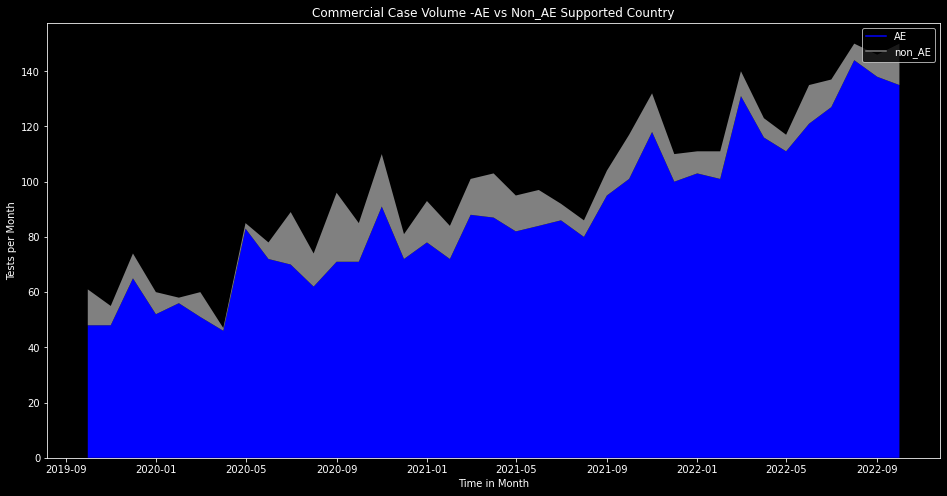

In [ ]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')
plt.subplots(figsize=(16, 8))


# Plot x-labels, y-label and data
plt.plot([], [], color ="blue",
         label ="AE")
plt.plot([], [], color ='grey',
         label ='non_AE')



plt.stackplot(AE_pivot.index, AE_pivot["AE"],
              AE_pivot["non_AE"],
             
              colors =["blue", 'grey'])
 
plt.grid(False)
plt.legend(loc='upper right')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Tests per Month')
 
# Title of Graph
plt.title('Commercial Case Volume -AE vs Non_AE Supported Country')

 
# Displaying Graph


plt.savefig("test_t.pdf", transparent = True)
#files.download("test_t.pdf")
plt.show()

In [ ]:
# Commercial volume 

In [ ]:
top_commercial_countries = top_comm_x_sales.groupby(["Year_Month", "Reporting Country"])["Sales"].sum().reset_index()
top_commercial_countries.head()

,Year_Month,Reporting Country,Sales
0,2019-10-01,BRAZIL,13
1,2019-10-01,CANADA,4
2,2019-10-01,FRANCE,1
3,2019-10-01,SPAIN,12
4,2019-10-01,TURKEY,4


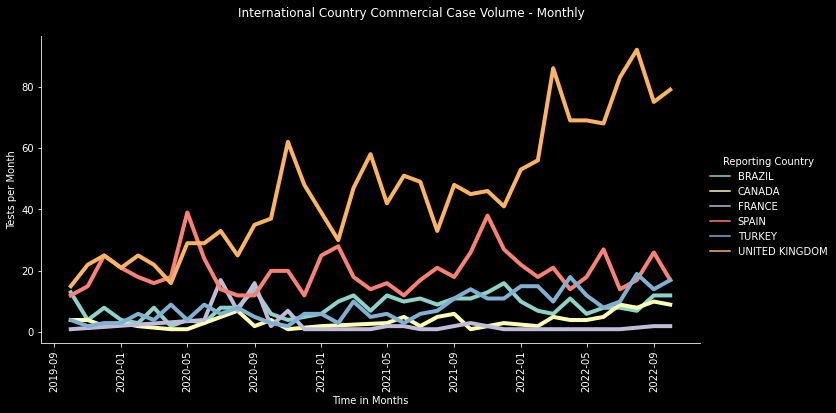

In [ ]:
#sns.set_style("whitegrid")
with mpl.rc_context({'axes.grid': False}):
  g = sns.relplot(data = top_commercial_countries  , x = "Year_Month", y = "Sales", hue = "Reporting Country", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)

g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"International Country Commercial Case Volume - Monthly", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Frequency plots

In [ ]:
df_merged_time_horizon.sample(3)

,Year_Month,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Amount
404,2020-04-01,A0249483,UNITED KINGDOM,Distributors : ROW,GHI_01,The Royal Marsden Hospital,Mary O'Brien,4/25/2020,Guardant 360,NaN,Commercial,AE,GBP,Europe,4,2020,2,1,2020-4,Free,0.0
3146,2022-07-01,A0545058,SPAIN,Distributors : ROW,GHI_19,Hospital Universitario HM Sanchinarro,Laura Rodriguez,7/21/2022,Guardant360 CDx EU,NaN,Commercial,AE,EUR,Europe,7,2022,3,1,2022-7,Paid,2500 USD
226,2020-01-01,A0223877,UNITED KINGDOM,Self-Pay Patient,GHI_01,Maidstone and Tunbridge Wells NHS Trust,Riyaz Shah,1/7/2020,Guardant 360,NaN,Commercial,AE,GBP,Europe,1,2020,1,1,2020-1,Free,0.0


In [ ]:
all_clini = df_merged_time_horizon["Contact: Full Name"].tolist()

In [ ]:
unique_clinician = set(all_clini)

# Productionized version of three monthly clinician ordering frequency

In [ ]:
#Input dataframe
input_df_freq_count = df_merged_time_horizon
#Define the list of countries
countries_clinician_list = [ 'UNITED KINGDOM' ]


In [ ]:
#Helper function
def count_clinician(num):
  if num > 4:
    return "More than five"
  if num > 1 & num <=4:
    return  "Between 2 to 5 test"
  if num == 1:
    return "One test in three months"

In [ ]:
#Select a dataframe with the rows for the specific country
freq_country_df= input_df_freq_count[input_df_freq_count['Reporting Country'].isin(countries_clinician_list)].set_index("Year_Month")
freq_country_df.tail()

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Amount
Year_Month,,,,,,,,,,,,,,,,,,,,
2022-10-01,A0603867,UNITED KINGDOM,Self-Pay Patient,GHI_01,University Hospitals Of Leicester,Sabri Ahmed,11/4/2022,Guardant 360,NaN,Commercial,AE,GBP,Europe,10,2022,4,1,2022-10,Free,0 GBP
2022-10-01,A0586622,UNITED KINGDOM,Self-Pay Patient,GHI_19,Guys Hospital,Harris Gousis,10/10/2022,Guardant360 CDx EU,NaN,Commercial,AE,GBP,Europe,10,2022,4,1,2022-10,Free,0 GBP
2022-10-01,A0596141,UNITED KINGDOM,Self-Pay Patient,GHI_01,Queen Alexandra Hospital,Sethupathi Ramalingam,11/7/2022,Guardant 360,NaN,Commercial,AE,GBP,Europe,10,2022,4,1,2022-10,Paid,2490 GBP
2022-10-01,A0597004,UNITED KINGDOM,Do Not Bill - Cancelled,GHI_01,Southampton General Hospital,Almurtadha Mula-Kh,11/9/2022,Guardant 360,NaN,Commercial,AE,GBP,Europe,10,2022,4,1,2022-10,Paid,0 GBP
2022-10-01,A0598358,UNITED KINGDOM,Self-Pay Patient,GHI_01,Charing Cross Hospital Medical Oncology Depart...,Laura Kenny,10/29/2022,Guardant 360,Breast,Commercial,AE,GBP,Europe,10,2022,4,1,2022-10,Free,0 GBP


In [ ]:
start_date_freq = "2021-10-01"
end_date_freq = "2022-10-31"
lookback_periode = 3 # in month
lookback_periode_slice = lookback_periode
#list_countries_freq = ["Spain"]
list_month = pd.date_range(start = start_date_freq, end = end_date_freq, freq = "M")


In [ ]:
from pandas.tseries.frequencies import DateOffset




# intermediate_start = pd.to_datetime(start_date_freq) + DateOffset(months = lookback_periode)
# intermediate_end = pd.to_datetime(intermediate_start) + DateOffset(months = lookback_periode)

In [ ]:
#dataframe = pd.DataFrame(columns=["Date", "Freq_Categories",  "Frequency"])
data = []
for month in list_month[lookback_periode_slice:]:
  intermediate_end = pd.to_datetime(month)
  intermediate_start = intermediate_end - DateOffset(months = lookback_periode)
  #print(intermediate_end)
  #print(intermediate_start)
  Interim_fre_df_1 = freq_country_df[intermediate_start:intermediate_end]
  #Interim_fre_df_2 = Interim_fre_df_1[Interim_fre_df_1["Reporting Country"].isin(list_countries_freq)]
  Interim_fre_df_3 = Interim_fre_df_1["Contact: Full Name"].value_counts()
  interim_freq_dict = {"Frequency": Interim_fre_df_3, "Date" : intermediate_start}
  freq_counts = pd.DataFrame(interim_freq_dict)
  freq_counts["Freq_Categories"] = freq_counts["Frequency"].apply(count_clinician)
  final = freq_counts.groupby(["Date", "Freq_Categories"])["Frequency"].count().reset_index()
  intermediate_start = intermediate_start + DateOffset(months = 1)
  data.append(final)

In [ ]:
freq_plot_df = pd.concat(data)
freq_plot_df.tail()

,Date,Freq_Categories,Frequency
1,2022-06-30,More than five,10
2,2022-06-30,One test in three months,90
0,2022-07-31,Between 2 to 5 test,41
1,2022-07-31,More than five,8
2,2022-07-31,One test in three months,91


In [ ]:
dd = freq_plot_df.pivot(index= "Date", columns = "Freq_Categories", values = "Frequency").reset_index()
dd = dd.melt(id_vars= "Date", value_name= "Frequency")
dd.sample(3)

,Date,Freq_Categories,Frequency
1,2021-11-28,Between 2 to 5 test,21
22,2021-12-31,One test in three months,72
20,2021-10-31,One test in three months,59


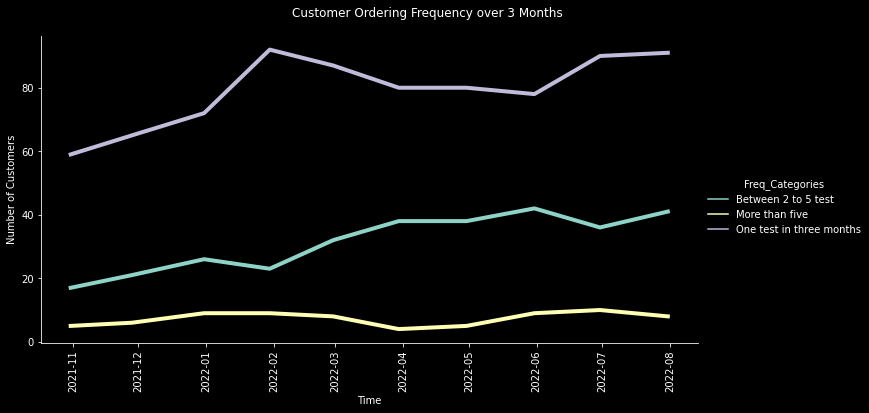

In [ ]:
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = dd  , x = "Date", y = "Frequency", hue = "Freq_Categories", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)

g.set_xticklabels(rotation = "90")

g.set_ylabels("Number of Customers")
g.set_xlabels("Time")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Customer Ordering Frequency over 3 Months", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Revenue Analysis

In [ ]:
#Create the data farme that will be used for revenue analysis
revenue_start = df_merged_time_horizon.copy()
revenue_start["Invoiced Amount"] = revenue_start["Invoiced Amount"].astype("string")

In [ ]:
revenue_start["Revenue(Local_Curr)"] = revenue_start["Invoiced Amount"].str.extract('(\d+,?\d*)')
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].fillna("0")
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].str.replace(",","")
revenue_start["Revenue(Local_Curr)"] = revenue_start["Revenue(Local_Curr)"].astype(float)

In [ ]:
lookup_currency["Date"] = lookup_currency.index.to_numpy().astype('datetime64[M]').astype(str)
lookup_currency_wide = lookup_currency
lookup_currency_wide.head(3)



,EUR,GBP,old,Unnamed: 4,USD,Date
Month,,,,,,
2015-08-01,1.11,1.56,2022-08-15,NaN,1,2015-08
2015-09-01,1.12,1.53,2022-09-15,NaN,1,2015-09
2015-10-01,1.12,1.53,2022-10-15,NaN,1,2015-10


In [ ]:
lookup_currency_long = lookup_currency_wide.melt(id_vars = ["Date"], value_vars = ["EUR", "GBP", "USD"], var_name = "Currency", value_name = "Value")
#lookup_currency.tail(3)


In [ ]:
lookup_currency_long

,Date,Currency,Value
0,2015-08,EUR,1.11
1,2015-09,EUR,1.12
2,2015-10,EUR,1.12
3,2015-11,EUR,1.07
4,2015-12,EUR,1.09
...,...,...,...
256,2022-06,USD,1.00
257,2022-07,USD,1.00
258,2022-08,USD,1.00
259,2022-09,USD,1.00


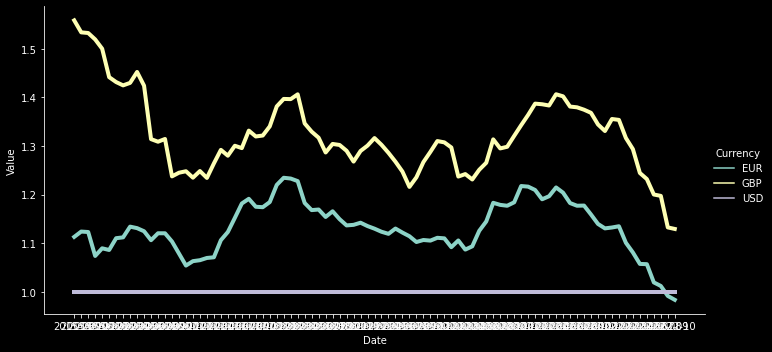

In [ ]:
#Helper plot to understand if their are iutliers in the currency data
#lookup_currency_long.plot(x = "Date", y = "Value", hue = "Currency")
sns.relplot(data = lookup_currency_long , x = "Date", y = "Value", hue = "Currency", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)


In [ ]:
# Create a string based column that can be used to lookup a columnb value in other table - Specifically the month_year date
revenue_start["Month_to_match"] = revenue_start["Year_Month"].dt.to_period('M').astype(str)
#revenue_start["Month_to_match"].astype(str).unique().tolist()

# Create a string based column that can be used to lookup a column value in other table - Specifically the currency

In [ ]:
revenue_start.shape

(3647, 22)

In [ ]:
lookup_currency_long.head(3)


,Date,Currency,Value
0,2015-08,EUR,1.11
1,2015-09,EUR,1.12
2,2015-10,EUR,1.12


In [ ]:
revenue = revenue_start.merge(lookup_currency_long, left_on = ["Month_to_match", "Currency"], right_on = ["Date", "Currency"])
revenue.shape

(3647, 24)

In [ ]:
revenue.sample(3)

,Year_Month,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Amount,Revenue(Local_Curr),Date,Value
2466,2022-02-01,A0467739,SPAIN,Self-Pay Patient,GHI_01,Clinica Rotger Quironsalud,Teresa Acuna,2/19/2022,Guardant 360,NaN,Commercial,AE,EUR,Europe,2,2022,1,1,2022-02,Paid,1245 EUR,1245.0,2022-02,1.13
913,2020-10-01,A0297820,SPAIN,Distributors : ROW,GHI_01,Hospital Quironsalud Sagrado Corazon,Juan Antonio Virizuela,10/31/2020,Guardant 360,NaN,Commercial,AE,EUR,Europe,10,2020,4,1,2020-10,Paid,2490.0,2490.0,2020-10,1.18
3458,2022-09-01,A0571736,SPAIN,Self-Pay Sponsored,GHI_19,Hospital del Mar,Laura Visa,9/13/2022,Guardant360 CDx EU,GI,Commercial,AE,EUR,Europe,9,2022,3,1,2022-09,Paid,1245 EUR,1245.0,2022-09,0.99


In [ ]:
revenue["Revenue (USD)"] = revenue["Revenue(Local_Curr)"]*revenue["Value"]

In [ ]:
revenue.head(3)

,Year_Month,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Amount,Revenue(Local_Curr),Date,Value,Revenue (USD)
0,2019-10-01,A0201497,SPAIN,Distributors : ROW,GHI_01,Hospital Quiron Barcelona,Jose Luis Cuadra,10/17/2019,Guardant 360,NaN,Commercial,AE,EUR,Europe,10,2019,4,1,2019-10,Paid,2303.0,2303.0,2019-10,1.11,2548.19
1,2019-10-01,A0201788,SPAIN,Distributors : ROW,GHI_01,Hospital Universitario HM Sanchinarro,Laura Rodriguez,10/18/2019,Guardant 360,NaN,Commercial,AE,EUR,Europe,10,2019,4,1,2019-10,Paid,2500.0,2500.0,2019-10,1.11,2766.16
2,2019-10-01,A0201952,GREECE,Self-Pay Patient,GHI_01,Evgenidio Hospital SA,Constantinos Papadimitris,10/24/2019,Guardant 360,GI,Commercial,non_AE,EUR,Europe,10,2019,4,1,2019-10,Paid,2400.0,2400.0,2019-10,1.11,2655.52


In [ ]:
# Save revenue datafr

In [ ]:
revenue_month = revenue.groupby(["Month_to_match"])["Revenue (USD)"].sum().reset_index()
revenue_month.head()

,Month_to_match,Revenue (USD)
0,2019-10,141770.48
1,2019-11,137523.73
2,2019-12,206251.39
3,2020-01,144276.40
4,2020-02,150907.07


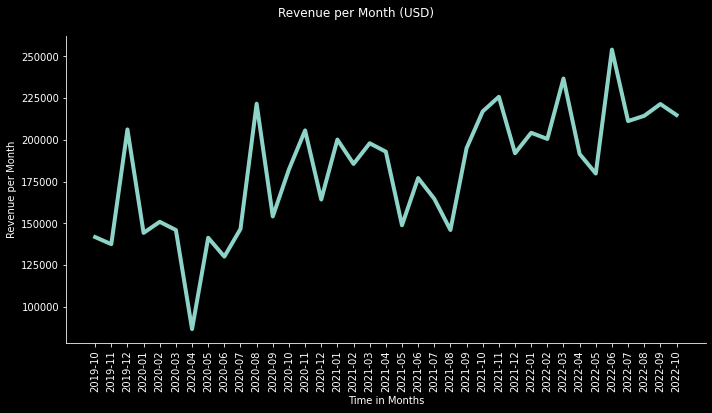

In [ ]:
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = revenue_month , x = "Month_to_match", y = "Revenue (USD)", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Revenue per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Revenue per Month (USD)', y=1.05)

plt.savefig('facet_plot.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("facet_plot.pdf")
plt.show()

In [ ]:
revenue_month["3-Month Rolling Average"] = revenue_month["Revenue (USD)"].rolling(3).mean()

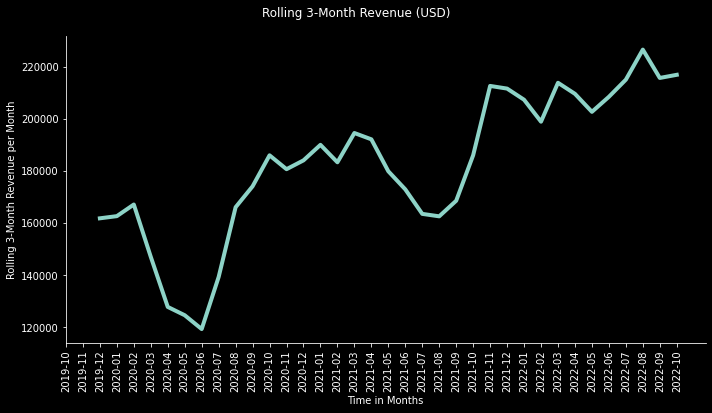

In [ ]:
with mpl.rc_context({'axes.grid': False}): 

  g = sns.relplot(data = revenue_month , x = "Month_to_match", y = "3-Month Rolling Average", kind = "line",
                linewidth=4 , ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Rolling 3-Month Revenue per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Rolling 3-Month Revenue (USD)', y=1.05)

plt.savefig('facet_plot.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("facet_plot.pdf")
plt.show()

### Analyse the conversion rate of new customers

In [ ]:
#This is the startimg point for the analysis of the new customer conversion rate

# Select a time periode _ e.g. 6 months window/lag
# identify the clinicians in the next three month that have not ordered before - Create two list and use set on them
#Take the list of names and count how often each name has ordered three or more times - It is important to identify the time point where the customer ordered the first time



revenue.info()
revenue.to_csv("revenue.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3647 entries, 0 to 3646
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year_Month             3647 non-null   datetime64[ns]
 1   Accession #            3647 non-null   object        
 2   Reporting Country      3647 non-null   object        
 3   Billing Type           3647 non-null   object        
 4   LIMS Project ID        3647 non-null   object        
 5   Account: Account Name  3647 non-null   object        
 6   Contact: Full Name     3647 non-null   object        
 7   Final Report Date      3643 non-null   object        
 8   Test Type              3647 non-null   object        
 9   Cancer Type            1227 non-null   object        
 10  Type                   3647 non-null   category      
 11  AE_supported           3647 non-null   object        
 12  Currency               3647 non-null   object        
 13  Sub

In [ ]:
revenue["Reporting Country"].value_counts()

UNITED KINGDOM     1703
SPAIN               732
BRAZIL              309
TURKEY              305
CANADA              116
IRELAND              91
FRANCE               71
MEXICO               67
GERMANY              62
CHILE                47
FINLAND              40
ITALY                30
LITHUANIA            11
AUSTRIA               9
GREECE                8
BELGIUM               7
SWITZERLAND           6
PERU                  6
SLOVENIA              5
ROMANIA               5
ARGENTINA             4
COLOMBIA              4
NORTH MACEDONIA       2
POLAND                2
HUNGARY               1
UKRAINE               1
LUXEMBOURG            1
COSTA RICA            1
PORTUGAL              1
Name: Reporting Country, dtype: int64

In [ ]:
new_customer = revenue.set_index("Year_Month")

In [ ]:
new_customer

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Month_to_match,FOC,Invoiced Amount,Revenue(Local_Curr),Date,Value,Revenue (USD)
Year_Month,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01,A0201497,SPAIN,Distributors : ROW,GHI_01,Hospital Quiron Barcelona,Jose Luis Cuadra,10/17/2019,Guardant 360,NaN,Commercial,AE,EUR,Europe,10,2019,4,1,2019-10,Paid,2303.0,2303.0,2019-10,1.11,2548.19
2019-10-01,A0201788,SPAIN,Distributors : ROW,GHI_01,Hospital Universitario HM Sanchinarro,Laura Rodriguez,10/18/2019,Guardant 360,NaN,Commercial,AE,EUR,Europe,10,2019,4,1,2019-10,Paid,2500.0,2500.0,2019-10,1.11,2766.16
2019-10-01,A0201952,GREECE,Self-Pay Patient,GHI_01,Evgenidio Hospital SA,Constantinos Papadimitris,10/24/2019,Guardant 360,GI,Commercial,non_AE,EUR,Europe,10,2019,4,1,2019-10,Paid,2400.0,2400.0,2019-10,1.11,2655.52
2019-10-01,A0201967,SPAIN,Distributors : ROW,GHI_01,Clinica Universidad de Navarra,Ana Chopitea Ortega,10/21/2019,Guardant 360,NaN,Commercial,AE,EUR,Europe,10,2019,4,1,2019-10,Paid,2500.0,2500.0,2019-10,1.11,2766.16
2019-10-01,A0201968,SPAIN,Distributors : ROW,GHI_01,Clinica Universidad de Navarra-Madrid,Javier Rodriguez,10/21/2019,Guardant 360,Other,Commercial,AE,EUR,Europe,10,2019,4,1,2019-10,Paid,2500.0,2500.0,2019-10,1.11,2766.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,A0602305,BRAZIL,Distributors : ROW,GHI_01,Diagnosticos da America S.A.,Cristovam Scapulatempo Neto,11/7/2022,Guardant 360,NaN,Commercial,AE,USD,Americas,10,2022,4,1,2022-10,Paid,1750 USD,1750.0,2022-10,1.00,1750.00
2022-10-01,A0597822,CANADA,Self-Pay Patient,GHI_01,Westglen Medical,Lisa Friedland,10/26/2022,Guardant 360,NaN,Commercial,AE,USD,Americas,10,2022,4,1,2022-10,Free,0 USD,0.0,2022-10,1.00,0.00
2022-10-01,A0602291,BRAZIL,Distributors : ROW,GHI_01,Diagnosticos da America S.A.,Cristovam Scapulatempo Neto,11/2/2022,Guardant 360,Head and neck carcinoma,Commercial,AE,USD,Americas,10,2022,4,1,2022-10,Paid,1750 USD,1750.0,2022-10,1.00,1750.00


In [ ]:
list_of_month = list(set(new_customer["Month_to_match"]))

In [ ]:
list_of_month

['2020-02',
 '2020-10',
 '2019-11',
 '2021-02',
 '2020-08',
 '2022-09',
 '2020-12',
 '2020-05',
 '2021-01',
 '2020-03',
 '2022-05',
 '2022-03',
 '2021-04',
 '2019-10',
 '2020-07',
 '2021-03',
 '2021-11',
 '2022-06',
 '2021-10',
 '2022-07',
 '2022-10',
 '2021-06',
 '2020-04',
 '2022-04',
 '2021-09',
 '2020-06',
 '2021-05',
 '2021-07',
 '2022-01',
 '2020-09',
 '2022-08',
 '2019-12',
 '2020-11',
 '2021-12',
 '2020-01',
 '2022-02',
 '2021-08']

In [ ]:

 date_index = pd.date_range("2020-01-01", periods=34, freq="MS")

In [ ]:
#Set up a dataframe for the first six month

start = "2020-01"

end = "2020-06"

In [ ]:
first_six_month = new_customer.loc[start:end]
list_first_six = first_six_month["Contact: Full Name"].to_list()
set_first_six = set(list_first_six)
set_first_six 

{'Ahmet Ozveren',
 'Ajay Mehta',
 'Alberto Hernando',
 'Aleix Prat',
 'Alejandro Navarro Mendivil',
 'Alesandro Passardi',
 'Alex Martinez',
 'Alison Jones',
 'Amaia Urrizola Martinez',
 'Amir Montazeri',
 'Ana Callejo',
 'Ana de Lara Gonzalez',
 'Andreas Makris',
 'Anthony Neal',
 'Antoine Hollebecque',
 'Antonio Burza',
 'Antonio Gonzalez Martin',
 'Artur Katz',
 'Atakan Demir',
 'Athanasios Pouptsis',
 'Brian Bird',
 'Carolina Selman',
 'Caroline Archer',
 'Carys Thomas',
 'Cengiz Yakicier',
 'Charles Hamilton',
 'Conrado Vogel',
 'Craig Macmillan',
 'Cristian Carvallo',
 'Cristina Carames Sanchez',
 'Cristovam Scapulatempo Neto',
 'Daniel Hochhauser',
 'Daniel Krell',
 'David Farrugia',
 'David Woolf',
 'Debashis Sarker',
 'Delvys Rodriguez Abreu',
 'Dilek Erdem',
 'Dionysis Papadatos-Pastos',
 'Eduardo Castanov',
 'Enriqueta Felip',
 'Eric Chen',
 'Eugenio Fernandez',
 'Francesc Salva Ballabrera',
 'Francisco Javier Roman Garcia',
 'Francisco Javier Ros Montana',
 'Goker Erdem',
 

In [ ]:
loop = new_customer.loc["2020-07"]

In [ ]:
list_loop = loop["Contact: Full Name"].to_list()

loop_set = set(list_loop )
loop_set.difference(set_first_six)

{'Alper Sevinc',
 'Anas Gazzah',
 'Andrea Varga',
 'Andrey Soares',
 'Angel Luis Guerrero Zotano',
 'Capucine Baldini',
 'Carolina Ortio Velez',
 'Christian Patricio Camacho Limas',
 'Christophe Massard',
 'Conleth Murphy',
 'David Eaton',
 'Ernest Nadal',
 'Jaime Espinos',
 'Jesus Corral',
 'Joanne Evans',
 'Jonathan Krell',
 'Juan David Assaf Pastrana',
 'Metin Kanitez',
 'Michael Duruisseaux',
 'Mike Bayne',
 'Nicky Levitt',
 'Patricia Martin-Romano',
 'Richard Adams',
 'Robert Leonard',
 'Roopinder Gillmore',
 'Sasa Badzek',
 'Umut Disel'}

In [ ]:
[name for name in list_loop if name not in list_first_six]

['Umut Disel',
 'Alper Sevinc',
 'Metin Kanitez',
 'Andrey Soares',
 'Roopinder Gillmore',
 'Mike Bayne',
 'David Eaton',
 'Nicky Levitt',
 'Richard Adams',
 'Robert Leonard',
 'Robert Leonard',
 'Jonathan Krell',
 'Sasa Badzek',
 'Joanne Evans',
 'Christian Patricio Camacho Limas',
 'Andrea Varga',
 'Carolina Ortio Velez',
 'Jaime Espinos',
 'Jesus Corral',
 'Anas Gazzah',
 'Juan David Assaf Pastrana',
 'Christophe Massard',
 'Capucine Baldini',
 'Andrea Varga',
 'Patricia Martin-Romano',
 'Angel Luis Guerrero Zotano',
 'Angel Luis Guerrero Zotano',
 'Conleth Murphy',
 'Ernest Nadal',
 'Michael Duruisseaux']

In [ ]:
print(f"The total number of customers since {revenue.min()} is {len(new_customer)}")

The total number of customers since Year_Month               2019-10-01 00:00:00
Accession #                         A0198954
Reporting Country                  ARGENTINA
Billing Type              Distributors : ROW
LIMS Project ID                       GH2_12
Account: Account Name           ABC Hospital
Contact: Full Name                Abha Gupta
Test Type                       Guardant 360
AE_supported                              AE
Currency                                 EUR
Sub_region                          Americas
Month                                      1
Year                                    2019
Quarter                                    1
Sales                                      1
Month_to_match                       2019-10
FOC                                         
Invoiced Amount                     0.00 EUR
Revenue(Local_Curr)                      0.0
Date                                 2019-10
Value                                   0.98
Revenue (USD)      

In [ ]:
type(revenue.min())

pandas.core.series.Series

In [ ]:
revenue.groupby("Contact: Full Name")["Sales"].sum().sort_values(ascending=True).tail(15)

Contact: Full Name
Daniel Krell                    37
Mary O'Brien                    37
John Bridgewater                38
Uwe Martens                     42
Noemi Reguart                   45
Riyaz Shah                      46
Hendrik-Tobias Arkenau          46
Juliana Garcia Carneiro         49
Thomas Newsom-Davis             59
Tony Dhillon                    63
Brian Bird                      87
Laura Rodriguez                 87
Sanjay Popat                   100
Cristovam Scapulatempo Neto    221
Gulay Ozgon                    254
Name: Sales, dtype: int64

### Biopharma

In [ ]:
total_sales_regions.head()

,Year_Month,Sales
0,2019-01-01,208
1,2019-02-01,197
2,2019-03-01,238
3,2019-04-01,220
4,2019-05-01,194


In [ ]:
import_sfdc.head(3)

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Currency,Sub_region,Month,Year,Quarter,Sales,Year_Month,Month_to_match
Date Received,,,,,,,,,,,,,,,,,,,
2019-11-25,A0214386,SWITZERLAND,Pharma : ROW,AMG_01,Universitatsspital Zurich,Alessandra Curioni Fontecedro,NaN,Guardant 360,NaN,Biopharma,non_AE,EUR,Europe,11,2019,4,1,2019-11-01,2019-11
2019-11-26,A0214865,CANADA,Pharma : ROW,AMG_01,Princess Margaret Cancer Centre,Adrian Sacher,NaN,Guardant 360,NaN,Biopharma,AE,USD,Americas,11,2019,4,1,2019-11-01,2019-11
2019-11-29,A0215878,BELGIUM,Pharma : ROW,AMG_01,Universitair Ziekenhuis Antwerpen,Hans Prenen,NaN,Guardant 360,NaN,Biopharma,non_AE,EUR,Europe,11,2019,4,1,2019-11-01,2019-11


In [ ]:
import_sfdc = import_sfdc.reset_index()
biopharma = import_sfdc[(import_sfdc["Type"] == "Biopharma" )]

In [ ]:
biopharma.groupby(["Year_Month", "Test Type"])["Sales"].sum()

Year_Month  Test Type   
2019-01-01  Guardant 360    144
2019-02-01  Guardant 360    180
2019-03-01  Guardant 360    188
2019-04-01  Guardant 360    151
2019-05-01  Guardant 360    154
2019-06-01  Guardant 360    148
2019-07-01  Guardant 360    159
2019-08-01  Guardant 360    175
2019-09-01  Guardant 360    176
2019-10-01  Guardant 360    242
2019-11-01  Guardant 360    128
2019-12-01  Guardant 360     59
2020-01-01  Guardant 360     74
2020-02-01  Guardant 360     72
2020-03-01  Guardant 360     73
2020-04-01  Guardant 360     44
2020-05-01  Guardant 360     65
2020-06-01  Guardant 360    109
2020-07-01  Guardant 360    137
2020-08-01  Guardant 360     88
2020-09-01  Guardant 360     60
2020-10-01  Guardant 360     43
2020-11-01  Guardant 360     77
2020-12-01  Guardant 360     62
2021-01-01  Guardant 360     66
2021-02-01  Guardant 360     68
2021-03-01  Guardant 360     76
2021-04-01  Guardant 360     71
2021-05-01  Guardant 360     85
2021-06-01  Guardant 360    138
2021-07-01  Gua